# Implement Neural Network (or Logistic Regression) From Scratch

Predicting if a person would buy life insurnace based on his age using logistic regression
Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't)

In [ ]:
#readcsv file
#Split train and test set
#Preprocessing: Scale the data so that both age and affordibility are in same scaling range dividing by 100
#model building phase==create neural network 
# keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
# 1 is specify one output bought_insurance and input_shape=(2,) that is age and affordibility for output layer mostly use sigmoid
#compile model and trained it
#evalute model to find loss and accuracy
#predict model to compare with y_test how much our model accurate
#find coef(weights), intercept  means bias
# calculate sigmoid 
# implement our own custom neural network class !! yay !! using class in python
#total 3 method and one init method 3 method are fit,predict and gradien descent
#in constructor or init method define w1,w2 and bias
#in fit method take parmeter self, X, y, epochs, loss_thresold ,inside fit method #in fit method take parmeter self, X, y, epochs, loss_thresold ,inside fit method 


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Specify the path to your CSV file
file_path = r'R:\ML\DEEP learning\csv\insurance_data.csv'

# Load the CSV file into a DataFrame
df= pd.read_csv(file_path)
df

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1
5,56,1,1
6,55,0,0
7,60,0,1
8,62,1,1
9,61,1,1


# Split train and test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

# Preprocessing: Scale the data so that both age and affordibility are in same scaling range

In [4]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

Model Building: First build a model in keras/tensorflow and see what weights and bias values it comes up with. We will than try to reproduce same weights and bias in our plain python implementation of gradient descent. Below is the architecture of our simple neural network

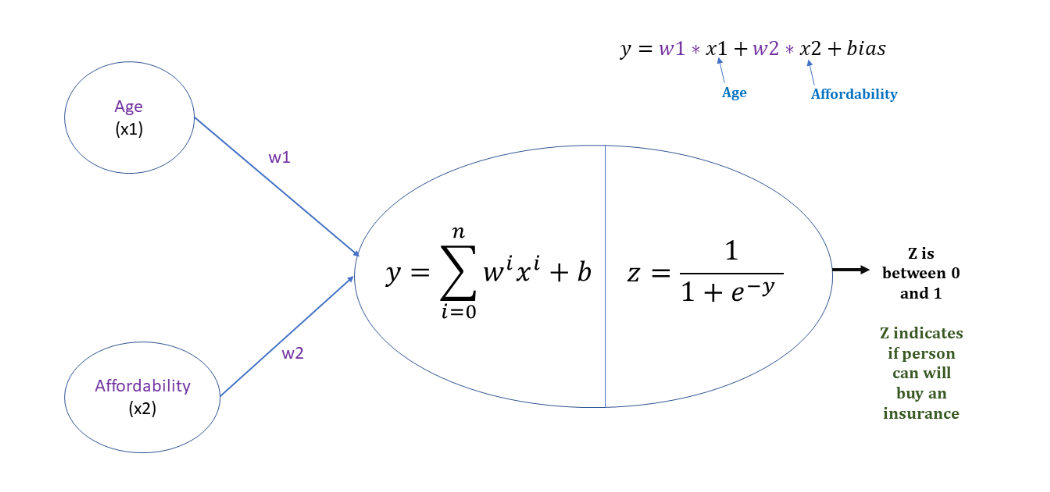

In [5]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5000)

C:\Users\rakes\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.7113
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.5000 - loss: 0.7110
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5000 - loss: 0.7106
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5000 - loss: 0.7102
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.5000 - loss: 0.7098
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5000 - loss: 0.7094
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5000 - loss: 0.7091
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5000 - loss: 0.7087
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.5000 - loss: 0.7083
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.5000 - loss: 0.7079
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5000 - loss: 0.7076
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step - accurac

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5000 - loss: 0.6690
Epoch 138/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5000 - loss: 0.6687
Epoch 139/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5000 - loss: 0.6685
Epoch 140/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5000 - loss: 0.6683
Epoch 141/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.6680
Epoch 142/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5000 - loss: 0.6678
Epoch 143/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5000 - loss: 0.6675
Epoch 144/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 0.6673
Epoch 145/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5000 - loss: 0.6671
Epoch 146/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5000 - loss: 0.6668
Epoch 147/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.6666
Epoch 148/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.6364 - loss: 0.6445
Epoch 272/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6364 - loss: 0.6444
Epoch 273/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6364 - loss: 0.6442
Epoch 274/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step - accuracy: 0.6364 - loss: 0.6441
Epoch 275/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.6364 - loss: 0.6440
Epoch 276/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6364 - loss: 0.6438
Epoch 277/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6364 - loss: 0.6437
Epoch 278/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6364 - loss: 0.6436
Epoch 279/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.6364 - loss: 0.6435
Epoch 280/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6364 - loss: 0.6433
Epoch 281/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.6364 - loss: 0.6432
Epoch 282/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.6364 - loss: 0.6313
Epoch 406/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.6364 - loss: 0.6312
Epoch 407/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6364 - loss: 0.6312
Epoch 408/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6364 - loss: 0.6311
Epoch 409/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step - accuracy: 0.6364 - loss: 0.6310
Epoch 410/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step - accuracy: 0.6364 - loss: 0.6309
Epoch 411/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.6364 - loss: 0.6309
Epoch 412/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6364 - loss: 0.6308
Epoch 413/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6364 - loss: 0.6307
Epoch 414/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6364 - loss: 0.6307
Epoch 415/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6364 - loss: 0.6306
Epoch 416/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6818 - loss: 0.6233
Epoch 540/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6818 - loss: 0.6232
Epoch 541/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6818 - loss: 0.6232
Epoch 542/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6818 - loss: 0.6231
Epoch 543/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6818 - loss: 0.6231
Epoch 544/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6818 - loss: 0.6230
Epoch 545/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6818 - loss: 0.6230
Epoch 546/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6818 - loss: 0.6229
Epoch 547/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6818 - loss: 0.6229
Epoch 548/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6818 - loss: 0.6228
Epoch 549/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6818 - loss: 0.6227
Epoch 550/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7273 - loss: 0.6166
Epoch 674/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7273 - loss: 0.6166
Epoch 675/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.7273 - loss: 0.6166
Epoch 676/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.7273 - loss: 0.6165
Epoch 677/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7273 - loss: 0.6165
Epoch 678/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7273 - loss: 0.6164
Epoch 679/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7273 - loss: 0.6164
Epoch 680/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.7273 - loss: 0.6163
Epoch 681/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.7273 - loss: 0.6163
Epoch 682/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7273 - loss: 0.6162
Epoch 683/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7273 - loss: 0.6162
Epoch 684/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7273 - loss: 0.6102
Epoch 808/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7273 - loss: 0.6101
Epoch 809/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.7273 - loss: 0.6101
Epoch 810/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7273 - loss: 0.6100
Epoch 811/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.7273 - loss: 0.6100
Epoch 812/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7273 - loss: 0.6099
Epoch 813/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.7273 - loss: 0.6099
Epoch 814/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7273 - loss: 0.6098
Epoch 815/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7273 - loss: 0.6098
Epoch 816/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7273 - loss: 0.6097
Epoch 817/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7273 - loss: 0.6097
Epoch 818/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - a

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6818 - loss: 0.6036
Epoch 942/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step - accuracy: 0.6818 - loss: 0.6035
Epoch 943/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6818 - loss: 0.6035
Epoch 944/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6818 - loss: 0.6034
Epoch 945/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6818 - loss: 0.6034
Epoch 946/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6818 - loss: 0.6033
Epoch 947/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.6818 - loss: 0.6033
Epoch 948/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6818 - loss: 0.6032
Epoch 949/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6818 - loss: 0.6032
Epoch 950/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6818 - loss: 0.6031
Epoch 951/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6818 - loss: 0.6031
Epoch 952/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - a

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6818 - loss: 0.5969
Epoch 1076/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6818 - loss: 0.5968
Epoch 1077/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6818 - loss: 0.5968
Epoch 1078/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6818 - loss: 0.5967
Epoch 1079/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - accuracy: 0.6818 - loss: 0.5967
Epoch 1080/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6818 - loss: 0.5966
Epoch 1081/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6818 - loss: 0.5966
Epoch 1082/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.6818 - loss: 0.5965
Epoch 1083/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6818 - loss: 0.5965
Epoch 1084/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6818 - loss: 0.5964
Epoch 1085/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6818 - loss: 0.5964
Epoch 1086/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6818 - loss: 0.5902
Epoch 1210/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.6818 - loss: 0.5901
Epoch 1211/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6818 - loss: 0.5901
Epoch 1212/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6818 - loss: 0.5900
Epoch 1213/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6818 - loss: 0.5900
Epoch 1214/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6818 - loss: 0.5899
Epoch 1215/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6818 - loss: 0.5899
Epoch 1216/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6818 - loss: 0.5898
Epoch 1217/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6818 - loss: 0.5898
Epoch 1218/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6818 - loss: 0.5897
Epoch 1219/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.6818 - loss: 0.5897
Epoch 1220/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6818 - loss: 0.5836
Epoch 1344/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6818 - loss: 0.5835
Epoch 1345/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6818 - loss: 0.5835
Epoch 1346/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6818 - loss: 0.5834
Epoch 1347/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.6818 - loss: 0.5834
Epoch 1348/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6818 - loss: 0.5833
Epoch 1349/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6818 - loss: 0.5833
Epoch 1350/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6818 - loss: 0.5832
Epoch 1351/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6818 - loss: 0.5832
Epoch 1352/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6818 - loss: 0.5831
Epoch 1353/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6818 - loss: 0.5831
Epoch 1354/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.6818 - loss: 0.5770
Epoch 1478/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.6818 - loss: 0.5770
Epoch 1479/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6818 - loss: 0.5769
Epoch 1480/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6818 - loss: 0.5769
Epoch 1481/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6818 - loss: 0.5768
Epoch 1482/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6818 - loss: 0.5768
Epoch 1483/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6818 - loss: 0.5767
Epoch 1484/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6818 - loss: 0.5767
Epoch 1485/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6818 - loss: 0.5766
Epoch 1486/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6818 - loss: 0.5766
Epoch 1487/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6818 - loss: 0.5765
Epoch 1488/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6818 - loss: 0.5706
Epoch 1612/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6818 - loss: 0.5705
Epoch 1613/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.6818 - loss: 0.5705
Epoch 1614/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6818 - loss: 0.5704
Epoch 1615/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6818 - loss: 0.5704
Epoch 1616/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6818 - loss: 0.5703
Epoch 1617/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.6818 - loss: 0.5703
Epoch 1618/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6818 - loss: 0.5702
Epoch 1619/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.6818 - loss: 0.5702
Epoch 1620/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6818 - loss: 0.5702
Epoch 1621/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6818 - loss: 0.5701
Epoch 1622/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6818 - loss: 0.5643
Epoch 1746/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.6818 - loss: 0.5643
Epoch 1747/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6818 - loss: 0.5642
Epoch 1748/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6818 - loss: 0.5642
Epoch 1749/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.6818 - loss: 0.5641
Epoch 1750/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6818 - loss: 0.5641
Epoch 1751/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step - accuracy: 0.6818 - loss: 0.5640
Epoch 1752/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.6818 - loss: 0.5640
Epoch 1753/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.6818 - loss: 0.5639
Epoch 1754/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step - accuracy: 0.6818 - loss: 0.5639
Epoch 1755/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.6818 - loss: 0.5638
Epoch 1756/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6818 - loss: 0.5612
Epoch 1813/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6818 - loss: 0.5612
Epoch 1814/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6818 - loss: 0.5611
Epoch 1815/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6818 - loss: 0.5611
Epoch 1816/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.6818 - loss: 0.5610
Epoch 1817/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6818 - loss: 0.5610
Epoch 1818/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6818 - loss: 0.5609
Epoch 1819/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6818 - loss: 0.5609
Epoch 1820/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.6818 - loss: 0.5609
Epoch 1821/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6818 - loss: 0.5608
Epoch 1822/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6818 - loss: 0.5608
Epoch 1823/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6818 - loss: 0.5552
Epoch 1947/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6818 - loss: 0.5551
Epoch 1948/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6818 - loss: 0.5551
Epoch 1949/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.6818 - loss: 0.5551
Epoch 1950/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6818 - loss: 0.5550
Epoch 1951/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.6818 - loss: 0.5550
Epoch 1952/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.6818 - loss: 0.5549
Epoch 1953/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.6818 - loss: 0.5549
Epoch 1954/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.6818 - loss: 0.5548
Epoch 1955/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.6818 - loss: 0.5548
Epoch 1956/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6818 - loss: 0.5547
Epoch 1957/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6818 - loss: 0.5493
Epoch 2081/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6818 - loss: 0.5493
Epoch 2082/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6818 - loss: 0.5492
Epoch 2083/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.6818 - loss: 0.5492
Epoch 2084/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.6818 - loss: 0.5492
Epoch 2085/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.6818 - loss: 0.5491
Epoch 2086/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.6818 - loss: 0.5491
Epoch 2087/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.6818 - loss: 0.5490
Epoch 2088/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6818 - loss: 0.5490
Epoch 2089/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6818 - loss: 0.5489
Epoch 2090/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.6818 - loss: 0.5489
Epoch 2091/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6818 - loss: 0.5465
Epoch 2148/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6818 - loss: 0.5464
Epoch 2149/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.6818 - loss: 0.5464
Epoch 2150/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.6818 - loss: 0.5463
Epoch 2151/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6818 - loss: 0.5463
Epoch 2152/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6818 - loss: 0.5463
Epoch 2153/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6818 - loss: 0.5462
Epoch 2154/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.6818 - loss: 0.5462
Epoch 2155/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6818 - loss: 0.5461
Epoch 2156/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6818 - loss: 0.5461
Epoch 2157/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6818 - loss: 0.5460
Epoch 2158/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7273 - loss: 0.5409
Epoch 2282/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7273 - loss: 0.5409
Epoch 2283/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7273 - loss: 0.5408
Epoch 2284/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7273 - loss: 0.5408
Epoch 2285/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.7273 - loss: 0.5407
Epoch 2286/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7273 - loss: 0.5407
Epoch 2287/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.7273 - loss: 0.5406
Epoch 2288/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.7273 - loss: 0.5406
Epoch 2289/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7273 - loss: 0.5406
Epoch 2290/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7273 - loss: 0.5405
Epoch 2291/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7273 - loss: 0.5405
Epoch 2292/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7273 - loss: 0.5355
Epoch 2416/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7273 - loss: 0.5355
Epoch 2417/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7273 - loss: 0.5354
Epoch 2418/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7273 - loss: 0.5354
Epoch 2419/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7273 - loss: 0.5353
Epoch 2420/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7273 - loss: 0.5353
Epoch 2421/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7273 - loss: 0.5353
Epoch 2422/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7273 - loss: 0.5352
Epoch 2423/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7273 - loss: 0.5352
Epoch 2424/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7273 - loss: 0.5352
Epoch 2425/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7273 - loss: 0.5351
Epoch 2426/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7273 - loss: 0.5303
Epoch 2550/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.7273 - loss: 0.5303
Epoch 2551/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.7273 - loss: 0.5302
Epoch 2552/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7273 - loss: 0.5302
Epoch 2553/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7273 - loss: 0.5302
Epoch 2554/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.7273 - loss: 0.5301
Epoch 2555/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7273 - loss: 0.5301
Epoch 2556/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7273 - loss: 0.5300
Epoch 2557/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.7273 - loss: 0.5300
Epoch 2558/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7273 - loss: 0.5300
Epoch 2559/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7273 - loss: 0.5299
Epoch 2560/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.7727 - loss: 0.5253
Epoch 2684/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7727 - loss: 0.5253
Epoch 2685/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7727 - loss: 0.5252
Epoch 2686/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7727 - loss: 0.5252
Epoch 2687/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7727 - loss: 0.5251
Epoch 2688/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7727 - loss: 0.5251
Epoch 2689/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7727 - loss: 0.5251
Epoch 2690/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7727 - loss: 0.5250
Epoch 2691/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.7727 - loss: 0.5250
Epoch 2692/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7727 - loss: 0.5250
Epoch 2693/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7727 - loss: 0.5249
Epoch 2694/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8182 - loss: 0.5205
Epoch 2818/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8182 - loss: 0.5204
Epoch 2819/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.8182 - loss: 0.5204
Epoch 2820/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8182 - loss: 0.5204
Epoch 2821/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8182 - loss: 0.5203
Epoch 2822/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8182 - loss: 0.5203
Epoch 2823/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8182 - loss: 0.5203
Epoch 2824/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8182 - loss: 0.5202
Epoch 2825/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8182 - loss: 0.5202
Epoch 2826/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8182 - loss: 0.5201
Epoch 2827/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8182 - loss: 0.5201
Epoch 2828/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8182 - loss: 0.5158
Epoch 2952/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8182 - loss: 0.5158
Epoch 2953/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.8182 - loss: 0.5157
Epoch 2954/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8182 - loss: 0.5157
Epoch 2955/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8182 - loss: 0.5157
Epoch 2956/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8182 - loss: 0.5156
Epoch 2957/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8182 - loss: 0.5156
Epoch 2958/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8182 - loss: 0.5156
Epoch 2959/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.8182 - loss: 0.5155
Epoch 2960/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8636 - loss: 0.5155
Epoch 2961/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.8636 - loss: 0.5155
Epoch 2962/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8636 - loss: 0.5113
Epoch 3086/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8636 - loss: 0.5113
Epoch 3087/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8636 - loss: 0.5113
Epoch 3088/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8636 - loss: 0.5112
Epoch 3089/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.8636 - loss: 0.5112
Epoch 3090/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8636 - loss: 0.5112
Epoch 3091/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.8636 - loss: 0.5111
Epoch 3092/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8636 - loss: 0.5111
Epoch 3093/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8636 - loss: 0.5111
Epoch 3094/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.8636 - loss: 0.5110
Epoch 3095/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8636 - loss: 0.5110
Epoch 3096/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8636 - loss: 0.5070
Epoch 3220/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.8636 - loss: 0.5070
Epoch 3221/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.8636 - loss: 0.5070
Epoch 3222/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.8636 - loss: 0.5069
Epoch 3223/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8636 - loss: 0.5069
Epoch 3224/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.8636 - loss: 0.5069
Epoch 3225/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8636 - loss: 0.5068
Epoch 3226/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.8636 - loss: 0.5068
Epoch 3227/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8636 - loss: 0.5068
Epoch 3228/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8636 - loss: 0.5067
Epoch 3229/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8636 - loss: 0.5067
Epoch 3230/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9091 - loss: 0.5029
Epoch 3354/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9091 - loss: 0.5028
Epoch 3355/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.9091 - loss: 0.5028
Epoch 3356/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9091 - loss: 0.5028
Epoch 3357/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9091 - loss: 0.5028
Epoch 3358/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9091 - loss: 0.5027
Epoch 3359/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.9091 - loss: 0.5027
Epoch 3360/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.9091 - loss: 0.5027
Epoch 3361/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9091 - loss: 0.5026
Epoch 3362/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9091 - loss: 0.5026
Epoch 3363/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9091 - loss: 0.5026
Epoch 3364/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9091 - loss: 0.4989
Epoch 3488/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9091 - loss: 0.4989
Epoch 3489/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9091 - loss: 0.4988
Epoch 3490/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9091 - loss: 0.4988
Epoch 3491/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9091 - loss: 0.4988
Epoch 3492/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9091 - loss: 0.4987
Epoch 3493/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9091 - loss: 0.4987
Epoch 3494/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.9091 - loss: 0.4987
Epoch 3495/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9091 - loss: 0.4986
Epoch 3496/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9091 - loss: 0.4986
Epoch 3497/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9091 - loss: 0.4986
Epoch 3498/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9091 - loss: 0.4950
Epoch 3622/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9091 - loss: 0.4950
Epoch 3623/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9091 - loss: 0.4950
Epoch 3624/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9091 - loss: 0.4950
Epoch 3625/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9091 - loss: 0.4949
Epoch 3626/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9091 - loss: 0.4949
Epoch 3627/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9091 - loss: 0.4949
Epoch 3628/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9091 - loss: 0.4948
Epoch 3629/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9091 - loss: 0.4948
Epoch 3630/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.9091 - loss: 0.4948
Epoch 3631/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9091 - loss: 0.4948
Epoch 3632/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9091 - loss: 0.4932
Epoch 3689/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9091 - loss: 0.4932
Epoch 3690/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9091 - loss: 0.4931
Epoch 3691/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9091 - loss: 0.4931
Epoch 3692/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9091 - loss: 0.4931
Epoch 3693/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.4930
Epoch 3694/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9091 - loss: 0.4930
Epoch 3695/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.9091 - loss: 0.4930
Epoch 3696/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.4930
Epoch 3697/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9091 - loss: 0.4929
Epoch 3698/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9091 - loss: 0.4929
Epoch 3699/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.9091 - loss: 0.4896
Epoch 3823/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9091 - loss: 0.4895
Epoch 3824/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9091 - loss: 0.4895
Epoch 3825/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.4895
Epoch 3826/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9091 - loss: 0.4894
Epoch 3827/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.9091 - loss: 0.4894
Epoch 3828/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.9091 - loss: 0.4894
Epoch 3829/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9091 - loss: 0.4894
Epoch 3830/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9091 - loss: 0.4893
Epoch 3831/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9091 - loss: 0.4893
Epoch 3832/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9091 - loss: 0.4893
Epoch 3833/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9091 - loss: 0.4861
Epoch 3957/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9091 - loss: 0.4860
Epoch 3958/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9091 - loss: 0.4860
Epoch 3959/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9091 - loss: 0.4860
Epoch 3960/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9091 - loss: 0.4860
Epoch 3961/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9091 - loss: 0.4859
Epoch 3962/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9091 - loss: 0.4859
Epoch 3963/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9091 - loss: 0.4859
Epoch 3964/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9091 - loss: 0.4859
Epoch 3965/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9091 - loss: 0.4858
Epoch 3966/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9091 - loss: 0.4858
Epoch 3967/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9091 - loss: 0.4827
Epoch 4091/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - accuracy: 0.9091 - loss: 0.4827
Epoch 4092/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9091 - loss: 0.4827
Epoch 4093/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9091 - loss: 0.4826
Epoch 4094/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9091 - loss: 0.4826
Epoch 4095/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9091 - loss: 0.4826
Epoch 4096/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9091 - loss: 0.4826
Epoch 4097/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9091 - loss: 0.4825
Epoch 4098/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9091 - loss: 0.4825
Epoch 4099/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9091 - loss: 0.4825
Epoch 4100/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9091 - loss: 0.4825
Epoch 4101/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.9091 - loss: 0.4795
Epoch 4225/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9091 - loss: 0.4795
Epoch 4226/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9091 - loss: 0.4794
Epoch 4227/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9091 - loss: 0.4794
Epoch 4228/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9091 - loss: 0.4794
Epoch 4229/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9091 - loss: 0.4794
Epoch 4230/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9091 - loss: 0.4794
Epoch 4231/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9091 - loss: 0.4793
Epoch 4232/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9091 - loss: 0.4793
Epoch 4233/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9091 - loss: 0.4793
Epoch 4234/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9091 - loss: 0.4793
Epoch 4235/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9091 - loss: 0.4764
Epoch 4359/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9091 - loss: 0.4764
Epoch 4360/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9091 - loss: 0.4763
Epoch 4361/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9091 - loss: 0.4763
Epoch 4362/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.9091 - loss: 0.4763
Epoch 4363/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.9091 - loss: 0.4763
Epoch 4364/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9091 - loss: 0.4763
Epoch 4365/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.4762
Epoch 4366/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9091 - loss: 0.4762
Epoch 4367/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.4762
Epoch 4368/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9091 - loss: 0.4762
Epoch 4369/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9091 - loss: 0.4734
Epoch 4493/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.9091 - loss: 0.4734
Epoch 4494/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9091 - loss: 0.4734
Epoch 4495/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.9091 - loss: 0.4733
Epoch 4496/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.9091 - loss: 0.4733
Epoch 4497/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9091 - loss: 0.4733
Epoch 4498/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9091 - loss: 0.4733
Epoch 4499/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9091 - loss: 0.4733
Epoch 4500/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.9091 - loss: 0.4732
Epoch 4501/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9091 - loss: 0.4732
Epoch 4502/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9091 - loss: 0.4732
Epoch 4503/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.9091 - loss: 0.4705
Epoch 4627/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.9091 - loss: 0.4705
Epoch 4628/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.9091 - loss: 0.4705
Epoch 4629/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9091 - loss: 0.4705
Epoch 4630/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9091 - loss: 0.4704
Epoch 4631/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9091 - loss: 0.4704
Epoch 4632/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9091 - loss: 0.4704
Epoch 4633/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.9091 - loss: 0.4704
Epoch 4634/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9091 - loss: 0.4704
Epoch 4635/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.4703
Epoch 4636/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9091 - loss: 0.4703
Epoch 4637/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9091 - loss: 0.4678
Epoch 4761/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.9091 - loss: 0.4677
Epoch 4762/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9091 - loss: 0.4677
Epoch 4763/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9091 - loss: 0.4677
Epoch 4764/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9091 - loss: 0.4677
Epoch 4765/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9091 - loss: 0.4677
Epoch 4766/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.9091 - loss: 0.4676
Epoch 4767/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9091 - loss: 0.4676
Epoch 4768/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9091 - loss: 0.4676
Epoch 4769/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9091 - loss: 0.4676
Epoch 4770/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.9091 - loss: 0.4676
Epoch 4771/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9091 - loss: 0.4664
Epoch 4828/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9091 - loss: 0.4664
Epoch 4829/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9091 - loss: 0.4664
Epoch 4830/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.9091 - loss: 0.4664
Epoch 4831/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9091 - loss: 0.4663
Epoch 4832/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9091 - loss: 0.4663
Epoch 4833/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9091 - loss: 0.4663
Epoch 4834/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.9091 - loss: 0.4663
Epoch 4835/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9091 - loss: 0.4663
Epoch 4836/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.4662
Epoch 4837/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.9091 - loss: 0.4662
Epoch 4838/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.4638
Epoch 4962/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9091 - loss: 0.4638
Epoch 4963/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9091 - loss: 0.4638
Epoch 4964/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9091 - loss: 0.4638
Epoch 4965/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9091 - loss: 0.4637
Epoch 4966/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.9091 - loss: 0.4637
Epoch 4967/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9091 - loss: 0.4637
Epoch 4968/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.9091 - loss: 0.4637
Epoch 4969/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9091 - loss: 0.4637
Epoch 4970/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9091 - loss: 0.4636
Epoch 4971/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.9091 - loss: 0.4636
Epoch 4972/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94m

# Evaluate the model on test set

In [7]:
model.evaluate(X_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 1.0000 - loss: 0.3550


[0.3549776077270508, 1.0]

In [8]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[0.70548487],
       [0.3556957 ],
       [0.16827832],
       [0.47801185],
       [0.72606957],
       [0.8294983 ]], dtype=float32)

In [9]:
y_test

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

# Now get the value of weights and bias from the model

In [10]:
coef, intercept = model.get_weights()

In [11]:
coef, intercept

(array([[5.060863 ],
        [1.4086521]], dtype=float32),
 array([-2.913703], dtype=float32))

This means w1=5.060867, w2=1.4086502, bias =-2.9137027

In [12]:
def sigmoid(x):
        import math
        return 1 / (1 + math.exp(-x))
sigmoid(18)

0.9999999847700205

In [13]:
X_test

,age,affordibility
2,47,1
10,18,1
21,26,0
11,28,1
14,49,1
9,61,1


Instead of model.predict, write our own prediction function that uses w1,w2 and bias

In [14]:
def prediction_function(age, affordibility):
    weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
    return sigmoid(weighted_sum)

prediction_function(.47, 1)

0.705484819775958

In [15]:
prediction_function(.18, 1)

0.35569571637887243

Now we start implementing gradient descent in plain python. Again the goal is to come up with same w1, w2 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent

First write couple of helper routines such as sigmoid and log_loss

In [16]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [17]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

# All right now comes the time to implement our own custom neural network class !! yay !!!

Step 1: The __init__ Method

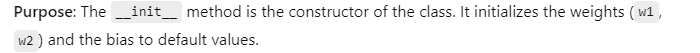
Step 2: The fit Method

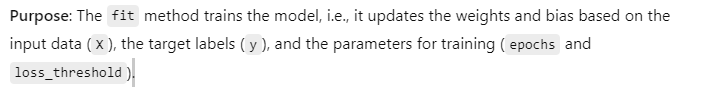
Step 3: The predict Method

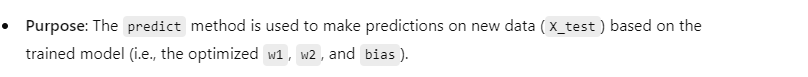
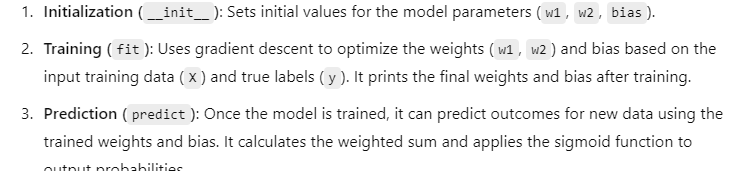

For gradient descent method
Step 1: Initialization
Step 2: Gradient Descent Loop==>This loop will run for a number of iterations (epochs), which defines how many times the weights will be updated.
Step 3: Predictions Using Current Weights and Bias

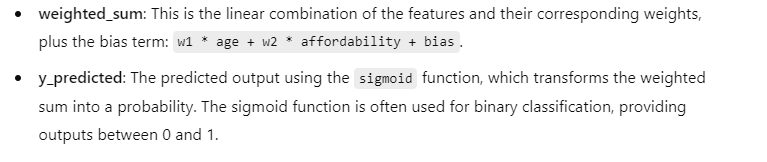
Step 4: Compute Loss==> It measures how far off the predicted probabilities (y_predicted) are from the actual labels (y_true).
Step 5: Compute Gradients
w1d: The gradient of the loss with respect to w1. This is computed by taking the average of the product of the feature age and the difference between the predicted and true values (y_predicted - y_true
Step 6: Update Weights and Bias
Step 7: Logging Progress Every 50 Epochs
Step 8: Early Stopping Based on Loss 

Th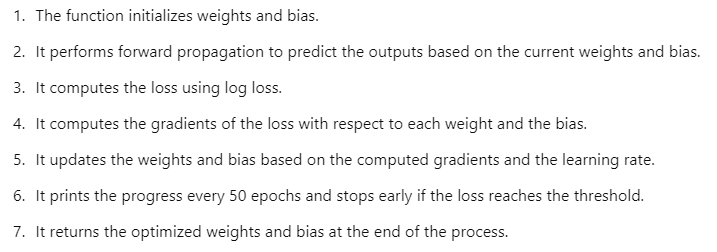reshold



In [1]:
class myNN:
    def __init__(self):
        self.w1 = 1 
        self.w2 = 1
        self.bias = 0
        
    def fit(self, X, y, epochs, loss_thresold):
        self.w1, self.w2, self.bias = self.gradient_descent(X['age'],X['affordibility'],y, epochs, loss_thresold)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")
        
    def predict(self, X_test):
        weighted_sum = self.w1*X_test['age'] + self.w2*X_test['affordibility'] + self.bias
        return sigmoid_numpy(weighted_sum)

    def gradient_descent(self, age,affordability, y_true, epochs, loss_thresold):
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = len(age)
        for i in range(epochs):
            weighted_sum = w1 * age + w2 * affordability + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(y_true, y_predicted)
            
            w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
            w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d
            
            if i%50==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
            
            if loss<=loss_thresold:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break

        return w1, w2, bias

In [19]:
customModel = myNN()
customModel.fit(X_train_scaled, y_train, epochs=8000, loss_thresold=0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:50, w1:1.503319554173139, w2:1.108384790367645, bias:-1.2319047301235464, loss:0.5675865113475955
Epoch:100, w1:2.2007131317600317, w2:1.2941584023238906, bias:-1.6607009122062801, loss:0.5390680417774752
Epoch:150, w1:2.8495727769689077, w2:1.369689549157275, bias:-1.986105845859897, loss:0.5176462164249294
Epoch:200, w1:3.443016970881803, w2:1.4042218624465033, bias:-2.2571369883752723, loss:0.5005011269691375
Epoch:250, w1:3.982450494649576, w2:1.4239127329321233, bias:-2.494377365971801, loss:0.48654089537617085
Epoch:300, w1:4.472179522095915, w2:1.438787986553552, bias:-2.707387811922373, loss:0.4750814640632793
Epoch:350, w1:4.917245868007634, w2:1.4525660781176122, bias:-2.901176333556766, loss:0.46561475306999006
Epoch:366, w1:5.051047623653049, w2:1.4569794548473887, bias:-2.9596534546250037, loss:0.46293944095888917
Final weights and bias: w1: 5.051047623653049, w2: 

In [20]:
coef, intercept

(array([[5.060863 ],
        [1.4086521]], dtype=float32),
 array([-2.913703], dtype=float32))

This shows that in the end we were able to come up with same value of w1,w2 and bias using a plain python implementation of gradient descent function

In [21]:
X_test_scaled

,age,affordibility
2,0.47,1
10,0.18,1
21,0.26,0
11,0.28,1
14,0.49,1
9,0.61,1


(1) Predict using custom model

In [22]:
customModel.predict(X_test_scaled)

2     0.705020
10    0.355836
21    0.161599
11    0.477919
14    0.725586
9     0.828987
dtype: float64

(2) Predict using tensorflow model

In [23]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[0.70548487],
       [0.3556957 ],
       [0.16827832],
       [0.47801185],
       [0.72606957],
       [0.8294983 ]], dtype=float32)

Above you can compare predictions from our own custom model and tensoflow model. You will notice that predictions are almost same